In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [4]:
indices = pd.read_csv(    "./data/Indices_Spectraux_Mali_2021.csv")indices.head()


,system:index,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,ADM2_CODE,ADM2_NAME,DISP_AREA,EXP2_YEAR,NDBI,NDMI,NDVI,SAVI,STATUS,STR2_YEAR,Shape_Area,Shape_Leng,UI,.geo
0,00000000000000001308,155,Mali,1927,Gao,19372,Ansongo,NO,3000,0.151313,-0.151313,0.111339,0.166996,Member State,1000,1.967182,6.923935,1.364826,"{""type"":""Polygon"",""coordinates"":[[[0.703160114..."
1,00000000000000001309,155,Mali,1927,Gao,19373,Bourem,NO,3000,0.144467,-0.144467,0.087510,0.131258,Member State,1000,3.631294,9.173268,1.340776,"{""type"":""Polygon"",""coordinates"":[[[-1.60946345..."
2,0000000000000000130a,155,Mali,1927,Gao,19374,Gao,NO,3000,0.158137,-0.158137,0.106176,0.159252,Member State,1000,2.936930,9.300375,1.382061,"{""type"":""Polygon"",""coordinates"":[[[-0.24199989..."
3,0000000000000000130b,155,Mali,1927,Gao,19375,Menaka,NO,3000,0.132679,-0.132679,0.104072,0.156098,Member State,1000,6.533067,11.383892,1.311785,"{""type"":""Polygon"",""coordinates"":[[[3.872140671..."
4,0000000000000000130c,155,Mali,1928,Kayes,19376,Bafoulabe,NO,3000,0.111311,-0.111311,0.223904,0.335817,Member State,1000,1.654719,6.707044,1.256538,"{""type"":""Polygon"",""coordinates"":[[[-11.4692493..."


In [6]:
gadm = gpd.read_file(    "./data/mli_admin_boundaries.shp")gadm.head()


/opt/anaconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'mli_admin_boundaries.shp': 'mli_admin2_em' (default), 'mli_adminpoints', 'mli_admin0_em', 'mli_admincapitals', 'mli_admin0', 'mli_admin1', 'mli_admin3', 'mli_adminlines', 'mli_admin2', 'mli_admin3_em', 'mli_admin1_em'. Specify layer parameter to avoid this warning.
  result = read_func(


,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,adm1_name,adm1_name1,adm1_name2,adm1_name3,adm1_pcode,adm0_name,adm0_name1,adm0_name2,adm0_name3,adm0_pcode,valid_on,valid_to,area_sqkm,version,lang,lang1,lang2,lang3,center_lat,center_lon,geometry
0,Bafoulabe,None,None,None,ML0101,Kayes,None,None,None,ML01,Mali,None,None,None,ML,2021-12-20,2025-09-04,19802.405942,v02,fr,None,None,None,13.675564,-10.725003,"POLYGON ((-10.27128 14.63815, -10.19528 14.606..."
1,Diéma,None,None,None,ML0102,Kayes,None,None,None,ML01,Mali,None,None,None,ML,2021-12-20,2025-09-04,12826.319832,v02,fr,None,None,None,14.649811,-9.264311,"POLYGON ((-9.32307 15.14695, -9.2323 15.1222, ..."
2,Kayes,None,None,None,ML0103,Kayes,None,None,None,ML01,Mali,None,None,None,ML,2021-12-20,2025-09-04,22671.631946,v02,fr,None,None,None,14.584590,-11.469622,"POLYGON ((-11.43597 15.64086, -11.43323 15.640..."
3,Kéniéba,None,None,None,ML0104,Kayes,None,None,None,ML01,Mali,None,None,None,ML,2021-12-20,2025-09-04,14908.578912,v02,fr,None,None,None,12.793179,-11.045416,"POLYGON ((-11.32625 13.53005, -11.29225 13.494..."
4,Kita,None,None,None,ML0105,Kayes,None,None,None,ML01,Mali,None,None,None,ML,2021-12-20,2025-09-04,35676.266638,v02,fr,None,None,None,13.203266,-9.390922,"POLYGON ((-8.9158 14.34506, -8.90262 14.34448,..."


In [16]:
# Harmonisation des noms de colonnes
gadm = gadm.rename(columns={"adm2_name": "ADM2_NAME"})

print(gadm.columns)


Index(['ADM2_NAME', 'adm2_name1', 'adm2_name2', 'adm2_name3', 'adm2_pcode',
       'adm1_name', 'adm1_name1', 'adm1_name2', 'adm1_name3', 'adm1_pcode',
       'adm0_name', 'adm0_name1', 'adm0_name2', 'adm0_name3', 'adm0_pcode',
       'valid_on', 'valid_to', 'area_sqkm', 'version', 'lang', 'lang1',
       'lang2', 'lang3', 'center_lat', 'center_lon', 'geometry'],
      dtype='object')


In [22]:
gadm = gadm.merge(
    indices,
    on="ADM2_NAME",
    how="left"
)

In [24]:
gadm[["ADM2_NAME", "NDVI", "NDBI", "NDMI", "SAVI", "UI"]].head()

,ADM2_NAME,NDVI,NDBI,NDMI,SAVI,UI
0,Bafoulabe,0.223904,0.111311,-0.111311,0.335817,1.256538
1,Diéma,NaN,NaN,NaN,NaN,NaN
2,Kayes,0.228857,0.112854,-0.112854,0.343246,1.261779
3,Kéniéba,NaN,NaN,NaN,NaN,NaN
4,Kita,0.261723,0.105038,-0.105038,0.392534,1.242133


In [30]:
ehcvm = pd.read_csv(    "./data/ehcvm_menage_mli2021.csv")ehcvm.head()


,country,hhid,year,grappe,menage,vague,PanelHH,logem,mur,toit,sol,eauboi_ss,eauboi_sp,elec_ac,elec_ur,elec_ua,ordure,toilet,eva_toi,eva_eau,s11q33,s11q37,tv,fer,frigo,cuisin,ordin,decod,car,superf,grosrum,petitrum,porc,lapin,volail,sh_id_demo,sh_co_natu,sh_co_eco,sh_id_eco,sh_co_vio,sh_co_oth
0,MLI,1001,2021,1,1,1,1,4,1,1,1,1,1,0,0,1,0,0,0,0,4,3,1,0,0,0,1,1,1,NaN,0.0,5.0,0.0,0.0,15.0,0,0,0,0,0,0
1,MLI,1002,2021,1,2,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,4,3,1,0,0,0,0,1,0,1.609500,8.0,5.0,0.0,0.0,8.0,0,1,0,0,0,0
2,MLI,1003,2021,1,3,1,1,2,1,1,1,1,0,0,0,1,0,0,0,0,4,3,1,0,0,0,0,0,0,4.835954,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0
3,MLI,1004,2021,1,4,1,1,2,1,1,1,1,0,0,0,1,0,0,0,0,4,3,0,0,0,0,0,0,0,2.431068,2.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
4,MLI,1005,2021,1,5,1,1,2,1,1,1,1,1,0,0,1,0,1,1,1,4,3,0,0,1,0,0,0,0,NaN,26.0,12.0,0.0,0.0,0.0,0,1,0,0,0,0


In [32]:
ehcvm_dep = ehcvm.groupby("grappe").agg(
    taux_electricite=("elec_ac", "mean"),
    taux_toilette_amelioree=("toilet", "mean"),
    taux_gestion_ordures=("ordure", "mean"),
    taille_moyenne_menage=("menage", "mean")
).reset_index()


In [34]:
gadm = gadm.merge(
    ehcvm_dep,
    left_on="ADM2_CODE",
    right_on="grappe",
    how="left"
)


In [38]:
def plot_index(gdf, column, title, cmap):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        ax=ax,
        missing_kwds={"color": "lightgrey"}
    )
    ax.set_title(title, fontsize=14)
    ax.axis("off")
    plt.show()


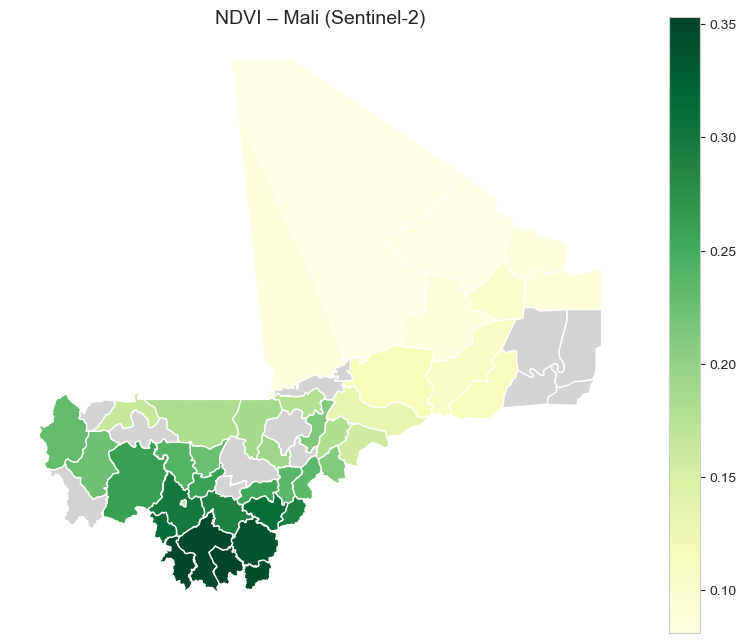

In [40]:
plot_index(gadm, "NDVI", "NDVI – Mali (Sentinel-2)", "YlGn")


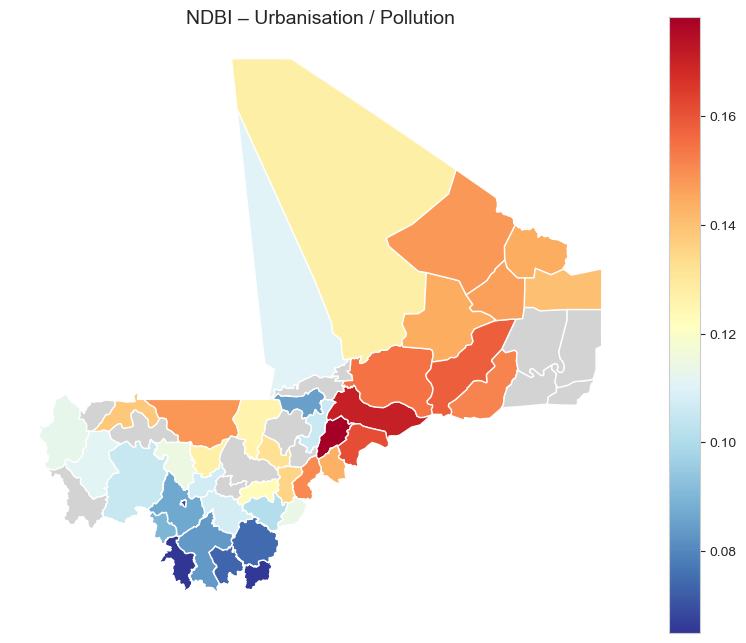

In [42]:
plot_index(gadm, "NDBI", "NDBI – Urbanisation / Pollution", "RdYlBu_r")


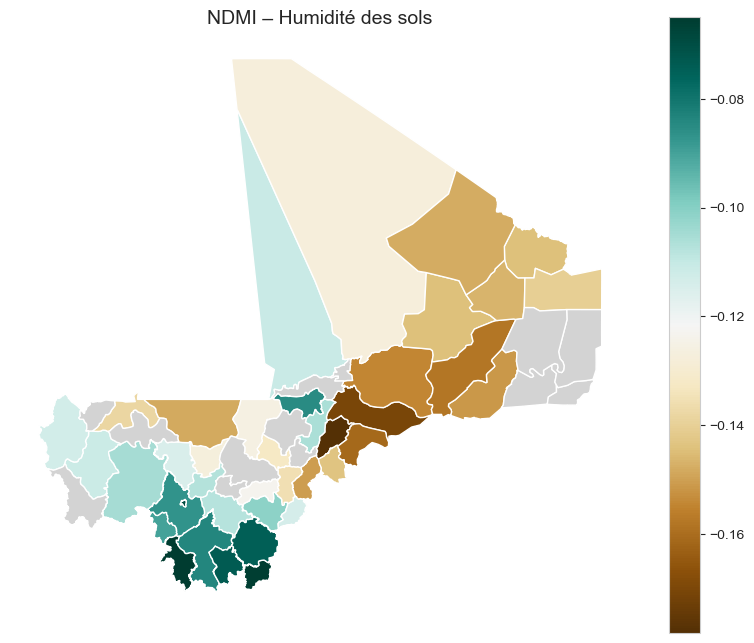

In [44]:
plot_index(gadm, "NDMI", "NDMI – Humidité des sols", "BrBG")


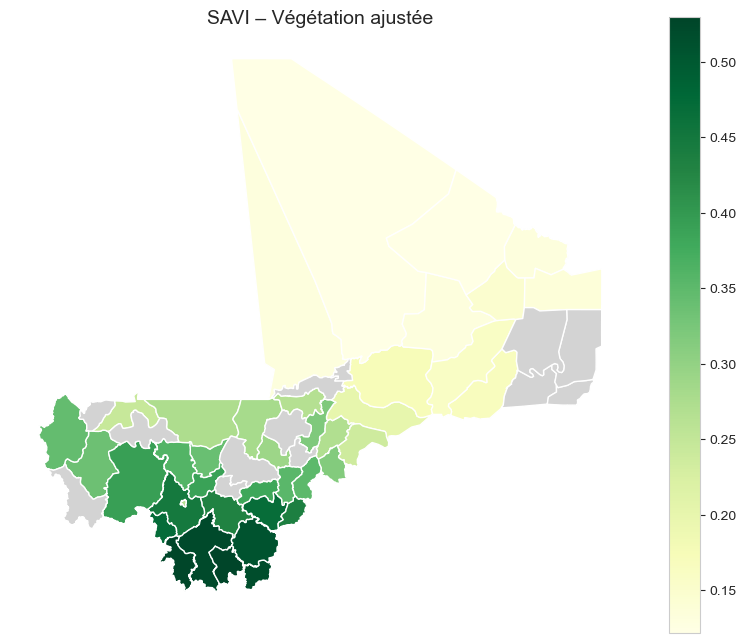

In [46]:
plot_index(gadm, "SAVI", "SAVI – Végétation ajustée", "YlGn")


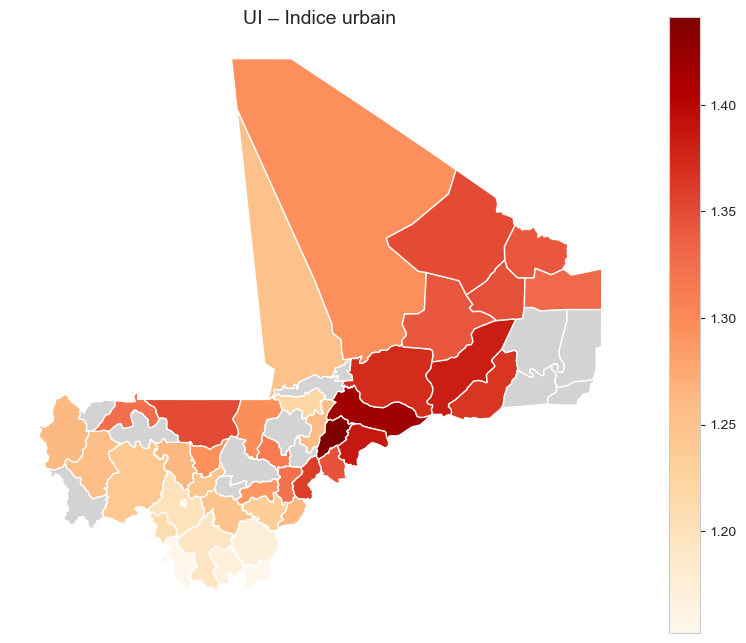

In [48]:
plot_index(gadm, "UI", "UI – Indice urbain", "OrRd")


In [56]:
indices_cols = ["NDVI", "NDBI", "NDMI", "SAVI", "UI"]

gadm[indices_cols].describe()


,NDVI,NDBI,NDMI,SAVI,UI
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.208196,0.120821,-0.120821,0.312262,1.285428
std,0.087015,0.030487,0.030487,0.130505,0.075632
min,0.081106,0.064920,-0.178275,0.121651,1.152166
25%,0.128986,0.104011,-0.145054,0.193464,1.239706
50%,0.211093,0.124387,-0.124387,0.316607,1.291975
75%,0.268296,0.145054,-0.104011,0.402394,1.345551
max,0.353206,0.178275,-0.064920,0.529745,1.441270


In [377]:
import csvinput_file = "./data/ehcvm_menage_mli2021.csv"output_file = "./data/ehcvm_menage_mli2021_clean.csv"with open(input_file, "r", encoding="utf-8") as f_in, \     open(output_file, "w", newline="", encoding="utf-8") as f_out:    reader = csv.reader(f_in, delimiter=",", quotechar='"', skipinitialspace=True)    writer = csv.writer(f_out, delimiter=";")      for row in reader:              clean_row = [cell.replace('"', '').strip() for cell in row]        writer.writerow(clean_row)print(f"Fichier nettoyé créé : {output_file}")


Fichier nettoyé créé : /Users/HP/Downloads/ehcvm_menage_mli2021_clean.csv


In [325]:
ehcvm = pd.read_csv(    "./data/ehcvm_menage_mli2021_clean.csv",    sep=";",      dtype=str)# Nettoyage des noms de colonnesehcvm.columns = (    ehcvm.columns    .str.lower()    .str.replace(" ", "_")    .str.replace("[^0-9a-z_]", "", regex=True))print(ehcvm.head())print(ehcvm.columns.tolist())


  country  hhid  year grappe menage vague panelhh logem mur toit sol  \
0     MLI  1001  2021      1      1     1       1     4   1    1   1   
1     MLI  1002  2021      1      2     1       1     1   1    1   1   
2     MLI  1003  2021      1      3     1       1     2   1    1   1   
3     MLI  1004  2021      1      4     1       1     2   1    1   1   
4     MLI  1005  2021      1      5     1       1     2   1    1   1   

  eauboi_ss eauboi_sp elec_ac elec_ur elec_ua ordure toilet eva_toi eva_eau  \
0         1         1       0       0       1      0      0       0       0   
1         1         1       0       0       1      0      0       0       0   
2         1         0       0       0       1      0      0       0       0   
3         1         0       0       0       1      0      0       0       0   
4         1         1       0       0       1      0      1       1       1   

  s11q33 s11q37 tv fer frigo cuisin ordin decod car            superf grosrum  \
0      4   

In [327]:

conditions_vie_cols = [
    "elec_ac",       
    "toilet",        
    "ordure",        
    "menage"         
]


for col in conditions_vie_cols:
    ehcvm[col] = pd.to_numeric(ehcvm[col], errors='coerce')


print(ehcvm[conditions_vie_cols].dtypes)
print(ehcvm[conditions_vie_cols].head())


elec_ac    int64
toilet     int64
ordure     int64
menage     int64
dtype: object
   elec_ac  toilet  ordure  menage
0        0       0       0       1
1        0       0       0       2
2        0       0       0       3
3        0       0       0       4
4        0       1       0       5


In [329]:
ehcvm_agg = ehcvm.groupby("grappe")[conditions_vie_cols].mean().reset_index()

print(ehcvm_agg.head())


  grappe   elec_ac    toilet    ordure  menage
0      1  0.000000  0.250000  0.000000     6.5
1     10  0.000000  0.000000  0.666667     6.5
2    101  0.000000  0.000000  0.000000     6.5
3   1015  0.916667  0.916667  1.000000     6.5
4   1016  0.916667  0.750000  1.000000     6.5


In [339]:
gadm['grappe'] = gadm['grappe'].astype(str)
ehcvm_agg['grappe'] = ehcvm_agg['grappe'].astype(str)


print(gadm['grappe'].head())
print(ehcvm_agg['grappe'].head())


df = gadm.merge(ehcvm_agg, on="grappe", how="left")
print(df.head())


0    nan
1    nan
2    nan
3    nan
4    nan
Name: grappe, dtype: object
0       1
1      10
2     101
3    1015
4    1016
Name: grappe, dtype: object
   adm2_name adm2_name1 adm2_name2 adm2_name3 adm2_pcode adm1_name adm1_name1  \
0  Bafoulabe       None       None       None     ML0101     Kayes       None   
1      Diéma       None       None       None     ML0102     Kayes       None   
2      Kayes       None       None       None     ML0103     Kayes       None   
3    Kéniéba       None       None       None     ML0104     Kayes       None   
4       Kita       None       None       None     ML0105     Kayes       None   

  adm1_name2 adm1_name3 adm1_pcode adm0_name adm0_name1 adm0_name2 adm0_name3  \
0       None       None       ML01      Mali       None       None       None   
1       None       None       ML01      Mali       None       None       None   
2       None       None       ML01      Mali       None       None       None   
3       None       None       ML01    

In [343]:
colonnes_numeriques = ehcvm.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Colonnes numériques :", colonnes_numeriques)

print(ehcvm[colonnes_numeriques].isna().sum())


Colonnes numériques : ['menage', 'elec_ac', 'ordure', 'toilet']
menage     0
elec_ac    0
ordure     0
toilet     0
dtype: int64


In [347]:
ehcvm = pd.read_csv(    "./data/ehcvm_menage_mli2021_clean.csv",    sep=";", dtype=str, engine="python")


In [349]:
ehcvm.columns = (
    ehcvm.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("é", "e")
    .str.replace("è", "e")
    .str.replace("à", "a")
    .str.replace("'", "")
    .str.replace("[^0-9a-z_]", "", regex=True)
)


In [351]:
colonnes_numeriques = ['menage', 'elec_ac', 'ordure', 'toilet']


indices_sentinel = ['ndvi', 'ndbi', 'ndmi', 'savi', 'ui']

for col in colonnes_numeriques + indices_sentinel:
    if col in ehcvm.columns:
        ehcvm[col] = pd.to_numeric(ehcvm[col], errors='coerce')


In [357]:
indices_sentinel_existants = [col for col in indices_sentinel if col in ehcvm.columns]


colonnes_a_agg = colonnes_numeriques + indices_sentinel_existants

df = ehcvm.groupby('grappe')[colonnes_a_agg].mean().reset_index()

print(df.head())


  grappe  menage   elec_ac    ordure    toilet
0      1     6.5  0.000000  0.000000  0.250000
1     10     6.5  0.000000  0.666667  0.000000
2    101     6.5  0.000000  0.000000  0.000000
3   1015     6.5  0.916667  1.000000  0.916667
4   1016     6.5  0.916667  1.000000  0.750000


In [359]:
print(df.isna().sum())


df.fillna(df.mean(numeric_only=True), inplace=True)


grappe     0
menage     0
elec_ac    0
ordure     0
toilet     0
dtype: int64


In [365]:
ehcvm = pd.read_csv("./data/ehcvm_menage_mli2021_clean.csv", sep=";", dtype=str, engine="python")ehcvm.columns = ehcvm.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)colonnes_numeriques = ['menage', 'elec_ac', 'ordure', 'toilet']for col in colonnes_numeriques:    ehcvm[col] = pd.to_numeric(ehcvm[col], errors='coerce')


In [369]:
sentinel_file = "./data/Indices_Spectraux_Mali_2021.csv"sentinel = pd.read_csv(sentinel_file, sep=";", dtype=str, engine="python")sentinel.columns = sentinel.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)indices_sentinel = ['ndvi', 'ndbi', 'ndmi', 'savi', 'ui']for col in indices_sentinel:    sentinel[col] = pd.to_numeric(sentinel[col], errors='coerce')


In [373]:
print(ehcvm.columns.tolist())


['country', 'hhid', 'year', 'grappe', 'menage', 'vague', 'panelhh', 'logem', 'mur', 'toit', 'sol', 'eauboi_ss', 'eauboi_sp', 'elec_ac', 'elec_ur', 'elec_ua', 'ordure', 'toilet', 'eva_toi', 'eva_eau', 's11q33', 's11q37', 'tv', 'fer', 'frigo', 'cuisin', 'ordin', 'decod', 'car', 'superf', 'grosrum', 'petitrum', 'porc', 'lapin', 'volail', 'sh_id_demo', 'sh_co_natu', 'sh_co_eco', 'sh_id_eco', 'sh_co_vio', 'sh_co_oth']


In [403]:
ehcvm_file = "./data/ehcvm_menage_mli2021_clean.csv"sentinel_file = "./data/Indices_Spectraux_Mali_2021.csv"ehcvm = pd.read_csv(ehcvm_file, sep=";", dtype=str, engine="python")ehcvm.columns = ehcvm.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)sentinel = pd.read_csv(    sentinel_file,    sep=",",    dtype=str,    engine="python",    on_bad_lines='skip')sentinel = sentinel[[c for c in sentinel.columns if '.geo' not in c]]sentinel.columns = sentinel.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)colonnes_numeriques = ['menage', 'elec_ac', 'ordure', 'toilet']indices_sentinel = ['ndvi', 'ndbi', 'ndmi', 'savi', 'ui']for col in colonnes_numeriques:    if col in ehcvm.columns:        ehcvm[col] = pd.to_numeric(ehcvm[col], errors='coerce')indices_existants = [col for col in indices_sentinel if col in sentinel.columns]for col in indices_existants:    sentinel[col] = pd.to_numeric(sentinel[col], errors='coerce')if 'grappe' not in ehcvm.columns:    raise ValueError("La colonne 'grappe' n'existe pas dans EHCVM")if 'grappe' not in sentinel.columns:    if 'adm2_code' in sentinel.columns:        sentinel['grappe'] = sentinel['adm2_code']    elif 'adm2_name' in sentinel.columns:        sentinel['grappe'] = sentinel['adm2_name']    else:        sentinel['grappe'] = range(len(sentinel))ehcvm['grappe'] = ehcvm['grappe'].astype(str)sentinel['grappe'] = sentinel['grappe'].astype(str)ehcvm_agg = ehcvm.groupby('grappe')[colonnes_numeriques].mean().reset_index()sentinel_agg = sentinel.groupby('grappe')[indices_existants].mean().reset_index()df = pd.merge(ehcvm_agg, sentinel_agg, on='grappe', how='inner')corr_focus = df[indices_existants + colonnes_numeriques].corr().loc[indices_existants, colonnes_numeriques]print("Tableau de corrélation Sentinel ↔ EHCVM :")print(corr_focus)


Tableau de corrélation Sentinel ↔ EHCVM :
Empty DataFrame
Columns: [menage, elec_ac, ordure, toilet]
Index: []


In [405]:
print("EHCVM grappe uniques:", ehcvm['grappe'].nunique())
print("Sentinel grappe uniques:", sentinel['grappe'].nunique())

communs = set(ehcvm['grappe']).intersection(set(sentinel['grappe']))
print("Nombre de grappe en commun:", len(communs))
print("Exemples de valeurs communes:", list(communs)[:10])

ehcvm['grappe'] = ehcvm['grappe'].str.strip().str.upper()
sentinel['grappe'] = sentinel['grappe'].str.strip().str.upper()

communs = set(ehcvm['grappe']).intersection(set(sentinel['grappe']))
print("Après nettoyage, nombre de grappe en commun:", len(communs))
print("Exemples:", list(communs)[:10])


EHCVM grappe uniques: 513
Sentinel grappe uniques: 4
Nombre de grappe en commun: 2
Exemples de valeurs communes: ['1', '2']
Après nettoyage, nombre de grappe en commun: 2
Exemples: ['1', '2']


In [421]:
# Fichiersehcvm_file = "./data/ehcvm_menage_mli2021_clean.csv"sentinel_file = "./data/Indices_Spectraux_Mali_2021.csv"# Lecture EHCVMehcvm = pd.read_csv(ehcvm_file, sep=";", dtype=str, engine="python")ehcvm.columns = ehcvm.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)colonnes_numeriques = ['menage', 'elec_ac', 'ordure', 'toilet']for col in colonnes_numeriques:    ehcvm[col] = pd.to_numeric(ehcvm[col], errors='coerce')# Lecture Sentinelsentinel = pd.read_csv(sentinel_file, sep=None, engine='python', on_bad_lines='skip', dtype=str)sentinel.columns = sentinel.columns.str.lower().str.replace(" ", "_").str.replace("[^0-9a-z_]", "", regex=True)indices_possibles = ['ndvi','ndbi','ndmi','savi','ui']indices_existants = [col for col in indices_possibles if col in sentinel.columns]for col in indices_existants:    sentinel[col] = pd.to_numeric(sentinel[col], errors='coerce')# Affichage des moyennes (au niveau global)print("Moyennes EHCVM :")print(ehcvm[colonnes_numeriques].mean())if indices_existants:    print("\nMoyennes Sentinel :")    print(sentinel[indices_existants].mean())else:    print("\nAucun indice Sentinel utilisable trouvé.")


Moyennes EHCVM :
menage     6.492430
elec_ac    0.291063
ordure     0.434315
toilet     0.193554
dtype: float64

Moyennes Sentinel :
ndvi    0.205721
ndbi    0.120319
ndmi   -0.119951
savi    0.308550
ui      1.284445
dtype: float64


In [437]:
sentinel_file = "./data/Indices_Spectraux_Mali_2021.csv"sentinel_raw = pd.read_csv(sentinel_file, sep=None, engine='python', dtype=str)print("Aperçu brut :")print(sentinel_raw.head())if sentinel_raw.shape[1] == 1:    col_data = sentinel_raw.columns[0]    print(f"Toute la donnée est dans la colonne : {col_data}")        sentinel_split = sentinel_raw[col_data].str.split(",", expand=True)else:    sentinel_split = sentinel_raw.copy()possible_indices = ['ndvi', 'ndbi', 'ndmi', 'savi', 'ui']sentinel_split.columns = [str(c).lower().replace(" ", "_").replace("-", "_") for c in sentinel_split.columns]indices_existants = [c for c in sentinel_split.columns if any(idx in c for idx in possible_indices)]print(f"Colonnes Sentinel détectées : {indices_existants}")for col in indices_existants:    sentinel_split[col] = pd.to_numeric(sentinel_split[col], errors='coerce')sentinel_clean = sentinel_split.dropna(subset=indices_existants, how='all')print("\nAperçu Sentinel nettoyé :")print(sentinel_clean[indices_existants].head())sentinel_clean.to_csv("Sentinel_clean.csv", index=False)


Aperçu brut :
           system:index ADM0_CODE ADM0_NAME ADM1_CODE ADM1_NAME ADM2_CODE  \
0                  1308       155      Mali      1927       Gao     19372   
1                  1309       155      Mali      1927       Gao     19373   
2  0000000000000000130a       155      Mali      1927       Gao     19374   
3  0000000000000000130b       155      Mali      1927       Gao     19375   
4  0000000000000000130c       155      Mali      1928     Kayes     19376   

   ADM2_NAME DISP_AREA EXP2_YEAR                 NDBI                  NDMI  \
0    Ansongo        NO      3000  0.15131273495197148  -0.15131273495197148   
1     Bourem        NO      3000  0.14446699192350218  -0.14446699192350218   
2        Gao        NO      3000  0.15813679305753106  -0.15813679305753106   
3     Menaka        NO      3000   0.1326790345641087   -0.1326790345641087   
4  Bafoulabe        NO      3000  0.11131054682757682  -0.11131054682757682   

                  NDVI                 SAVI     

In [441]:
import pandas as pdimport jsonsentinel_file = "./data/Indices_Spectraux_Mali_2021.csv"indices = ['NDBI', 'NDMI', 'NDVI', 'SAVI', 'UI', '.geo']df = pd.read_csv(    sentinel_file,    usecols=lambda x: x in indices,      on_bad_lines='skip',                sep=None,                         engine='python'                  )def parse_geo(geo_str):    try:        return json.loads(geo_str)    except:        return Nonedf['geometry'] = df['.geo'].apply(parse_geo)df = df.drop(columns=['.geo'])print(df.head())print(f"Colonnes chargées : {df.columns.tolist()}")


                  NDBI                  NDMI                 NDVI  \
0  0.15131273495197148  -0.15131273495197148  0.11133910930318903   
1  0.14446699192350218  -0.14446699192350218  0.08751039442535004   
2  0.15813679305753106  -0.15813679305753106  0.10617583493066625   
3   0.1326790345641087   -0.1326790345641087  0.10407229311373735   
4  0.11131054682757682  -0.11131054682757682  0.22390446803246675   

                  SAVI                  UI  \
0   0.1669957507797114  1.3648261033122289   
1  0.13125783446367106  1.3407759196633353   
2  0.15925210092904668  1.3820612888454396   
3   0.1560981802897024  1.3117854790462986   
4  0.33581682202206603  1.2565380254370024   

                                            geometry  
0  {'type': 'Polygon', 'coordinates': [[[0.703160...  
1  {'type': 'Polygon', 'coordinates': [[[-1.60946...  
2  {'type': 'Polygon', 'coordinates': [[[-0.24199...  
3  {'type': 'Polygon', 'coordinates': [[[3.872140...  
4  {'type': 'Polygon', 'coordinat

In [443]:
import geopandas as gpd
from shapely.geometry import shape


df['geometry'] = df['geometry'].apply(lambda x: shape(x) if x else None)


gdf = gpd.GeoDataFrame(df, geometry='geometry')

print(gdf.head())
print(gdf.crs)  


                  NDBI                  NDMI                 NDVI  \
0  0.15131273495197148  -0.15131273495197148  0.11133910930318903   
1  0.14446699192350218  -0.14446699192350218  0.08751039442535004   
2  0.15813679305753106  -0.15813679305753106  0.10617583493066625   
3   0.1326790345641087   -0.1326790345641087  0.10407229311373735   
4  0.11131054682757682  -0.11131054682757682  0.22390446803246675   

                  SAVI                  UI  \
0   0.1669957507797114  1.3648261033122289   
1  0.13125783446367106  1.3407759196633353   
2  0.15925210092904668  1.3820612888454396   
3   0.1560981802897024  1.3117854790462986   
4  0.33581682202206603  1.2565380254370024   

                                            geometry  
0  POLYGON ((0.70316 14.94583, 0.70787 14.94747, ...  
1  POLYGON ((-1.60946 17.1224, -1.58302 17.04383,...  
2  POLYGON ((-0.242 15.30438, -0.23378 15.37503, ...  
3  POLYGON ((3.87214 15.69188, 3.87387 15.69386, ...  
4  POLYGON ((-11.46925 13.69106, 

In [445]:
df.to_csv("Indices_Mali_2021_clean.csv", index=False)


gdf.to_file("Indices_Mali_2021.geojson", driver="GeoJSON")


/opt/anaconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:917: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [457]:
import pandas as pdimport geopandas as gpdimport jsonfrom shapely.geometry import shapefile_path = "./data/Indices_Spectraux_Mali_2021.csv"df_raw = pd.read_csv(file_path, sep=';', engine='python', on_bad_lines='skip')print("Colonnes détectées :", df_raw.columns.tolist())cols = ['NDBI','NDMI','NDVI','SAVI','UI','.geo']  # '.geo' correspond à geometrydf = df_raw[cols].copy()def geojson_to_shapely(geojson_str):    try:        geojson_dict = json.loads(geojson_str)        return shape(geojson_dict)    except:        return None  df['geometry'] = df['.geo'].apply(geojson_to_shapely)gdf = gpd.GeoDataFrame(df, geometry='geometry')gdf.set_crs(epsg=4326, inplace=True)  # WGS84print(gdf.head())print(gdf.info())gdf.to_file("Indices_Mali_2021_clean.geojson", driver="GeoJSON")


Colonnes détectées : ['system:index', 'ADM0_CODE', 'ADM0_NAME', 'ADM1_CODE', 'ADM1_NAME', 'ADM2_CODE', 'ADM2_NAME', 'DISP_AREA', 'EXP2_YEAR', 'NDBI', 'NDMI', 'NDVI', 'SAVI', 'STATUS', 'STR2_YEAR', 'Shape_Area', 'Shape_Leng', 'UI', '.geo', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 6

In [459]:
indices = ['NDBI', 'NDMI', 'NDVI', 'SAVI', 'UI']

for col in indices:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

gdf = gdf[gdf.geometry.notnull()]
gdf = gdf[gdf.is_valid]

print("Nombre d'entités valides :", len(gdf))


Nombre d'entités valides : 45


In [461]:
# ---------------- 3. Statistiques descriptives ----------------
stats_sentinel = gdf[indices].describe().T

print("\nStatistiques Sentinel :")
print(stats_sentinel)



Statistiques Sentinel :
      count      mean       std       min       25%       50%       75%  \
NDBI   45.0  0.124012  0.027316  0.065688  0.107370  0.127562  0.144368   
NDMI   44.0 -0.123687  0.027544 -0.178275 -0.144392 -0.127361 -0.107049   
NDVI   45.0  0.198345  0.076870  0.081106  0.133548  0.192770  0.239693   
SAVI   45.0  0.297488  0.115289  0.121651  0.200305  0.289130  0.359501   
UI     45.0  1.293700  0.067635  1.152166  1.251331  1.305406  1.341017   

           max  
NDBI  0.178275  
NDMI -0.065688  
NDVI  0.353206  
SAVI  0.529745  
UI    1.441270  


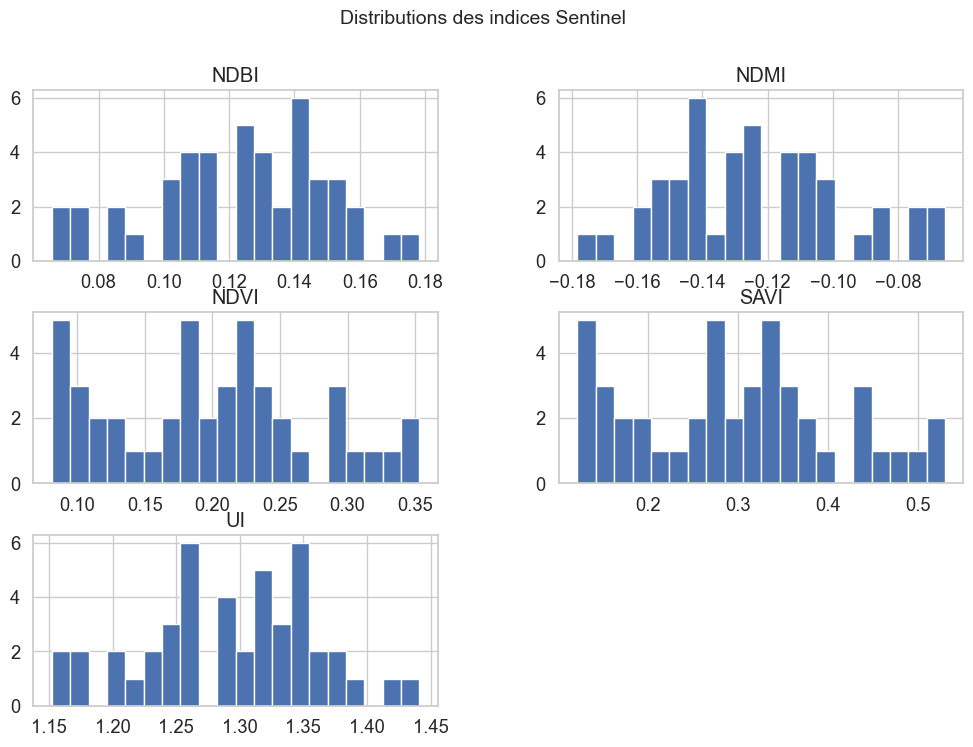

In [463]:
gdf[indices].hist(bins=20, figsize=(12,8))
plt.suptitle("Distributions des indices Sentinel", fontsize=14)
plt.show()


In [465]:
corr_sentinel = gdf[indices].corr(method='pearson')

print("\nCorrélations internes Sentinel :")
print(corr_sentinel)



Corrélations internes Sentinel :
          NDBI      NDMI      NDVI      SAVI        UI
NDBI  1.000000 -1.000000 -0.657164 -0.657156  0.995950
NDMI -1.000000  1.000000  0.655329  0.655321 -0.995988
NDVI -0.657164  0.655329  1.000000  1.000000 -0.659143
SAVI -0.657156  0.655321  1.000000  1.000000 -0.659136
UI    0.995950 -0.995988 -0.659143 -0.659136  1.000000


In [467]:
sentinel_means = gdf[indices].mean()

print("\nMoyennes Sentinel :")
print(sentinel_means)



Moyennes Sentinel :
NDBI    0.124012
NDMI   -0.123687
NDVI    0.198345
SAVI    0.297488
UI      1.293700
dtype: float64


In [469]:
gdf_clean = gdf[indices + ['geometry']]

gdf_clean.to_file("Sentinel_Mali_2021_READY.geojson", driver="GeoJSON")
gdf_clean.drop(columns='geometry').to_csv("Sentinel_Mali_2021_READY.csv", index=False)

print("Exports terminés")


Exports terminés
